# Business Problem

We need to predict the employment number by using the data which we have for various polulation, army , inflation.

We need to build a model such that if we have the data of above values then we can predict the employment. The data was random collection and the county and other confidential fields are not provided for analysis.

Data is of GNP.deflator, GNP Unemployed, Armed.Forces, Population, Employed variables. We have to use the data for prediction of the Employed variable.

This data is only of numbers so creating dummy and categorical data handling is saved here.

#  Step 1 : Importing Libraries and Understanding Data

In [1]:
import pandas as pd
# Importing LabourTrainingEvaluationData.csv
EmployedData = pd.read_csv('LR Practice data.csv')
# Looking at the first five rows
EmployedData.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221


In [2]:
# Looking at the last five rows
EmployedData.tail()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
2933,6674.161176,61175.01519,38691.13574,18103.20721,4365.946957,2161.472168
2934,6676.407794,61195.79363,38704.25206,18109.30618,4367.399196,2162.188679
2935,6678.654412,61216.57207,38717.36838,18115.40515,4368.851434,2162.905191
2936,6680.901029,61237.35050,38730.48471,18121.50412,4370.303672,2163.621703
2937,6683.147647,61258.12894,38743.60103,18127.60309,4371.755910,2164.338215


In [3]:
# What type of values are stored in the columns?
EmployedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GNP.deflator  2938 non-null   float64
 1   GNP           2938 non-null   float64
 2   Unemployed    2938 non-null   float64
 3   Armed.Forces  2938 non-null   float64
 4   Population    2938 non-null   float64
 5   Employed      2938 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


In [4]:
EmployedData.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,3383.989632,30744.994551,19482.279926,9171.264779,2239.144062,1112.140688
std,1905.742557,17625.763439,11126.209407,5173.587165,1231.892846,607.796778
min,83.000000,234.289000,187.000000,145.600000,107.608000,60.171000
25%,1734.410625,15488.427358,9851.619375,4693.095625,1172.838137,586.041925
50%,3383.989632,30744.994550,19482.279925,9171.264780,2239.144062,1112.140688
75%,5033.568639,46001.561743,29112.940480,13649.433937,3305.449986,1638.239451
max,6683.147647,61258.128940,38743.601030,18127.603090,4371.755910,2164.338215


# Step 2: Visualising Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

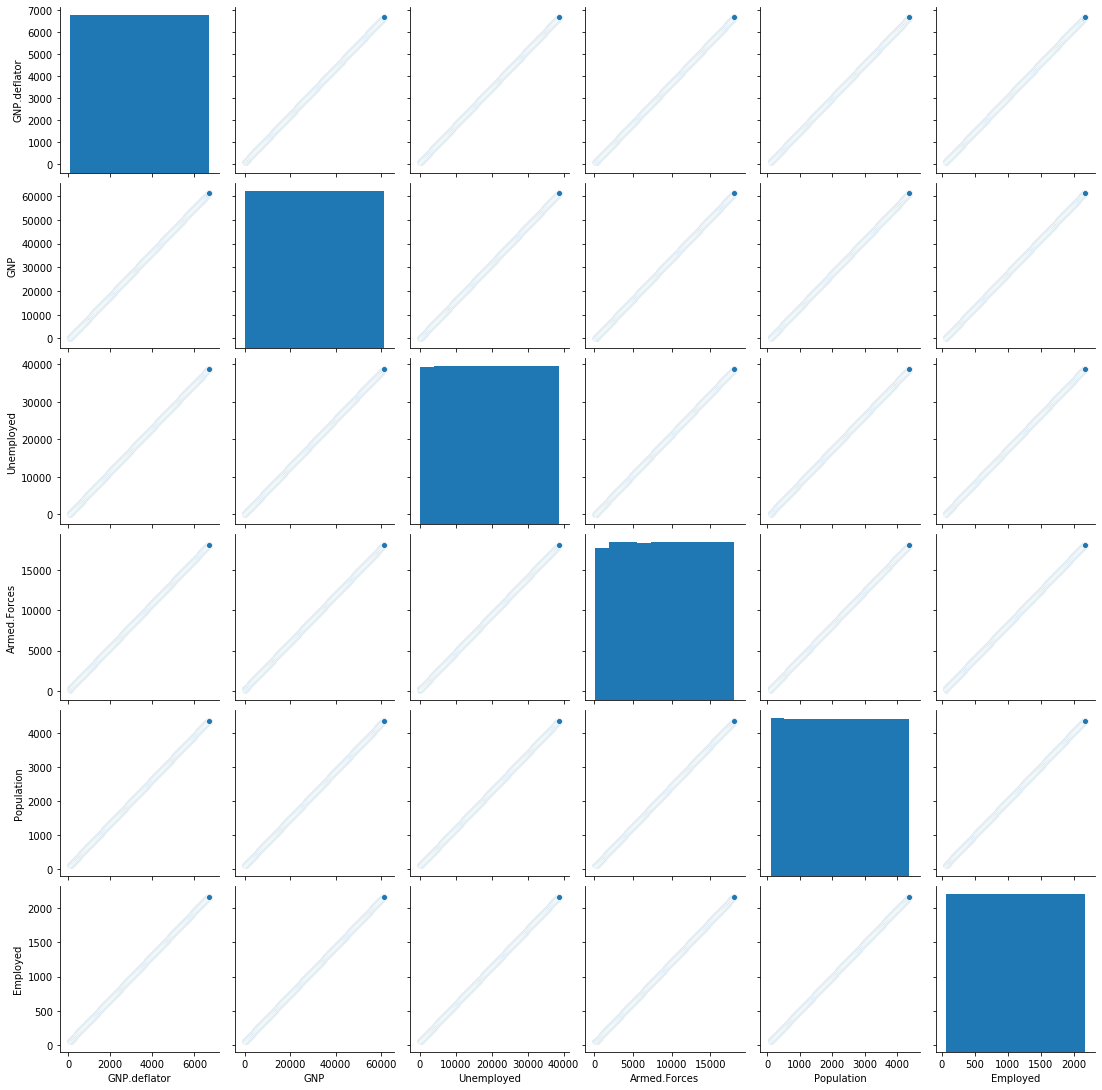

In [6]:
# Let's plot a pair plot of all numerical variables in our dataframe
sns.pairplot(EmployedData)

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


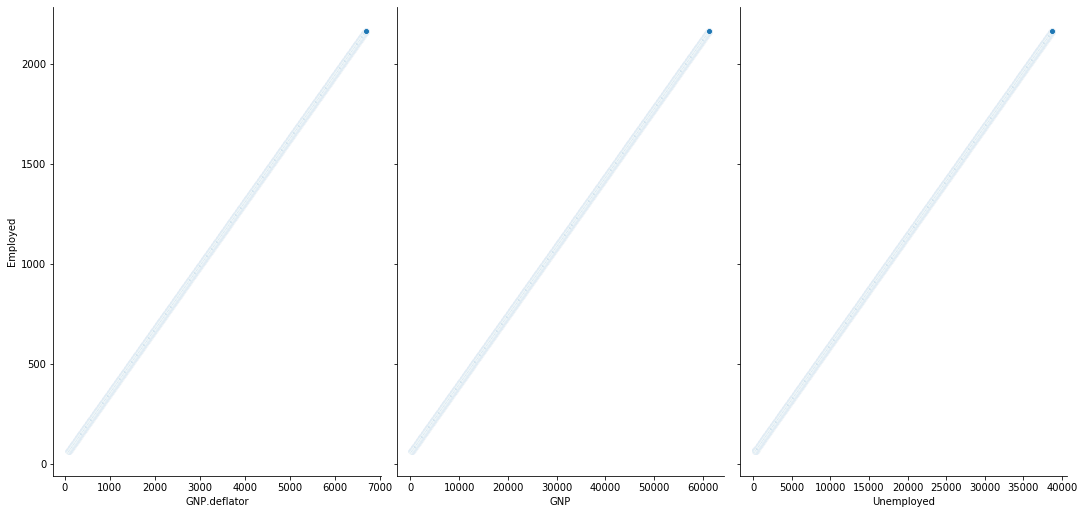

In [7]:
# Visualise the relationship between the features and the response using scatterplots
# Please do for remaining on your own..

sns.pairplot(EmployedData, x_vars=['GNP.deflator','GNP','Unemployed'], y_vars='Employed',
             size=7, aspect=0.7, kind='scatter')

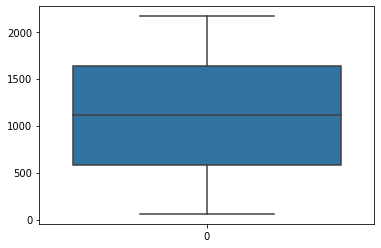

In [8]:
sns.boxplot(data=EmployedData["Employed"])

# Step 3 : Splitting the data in Training and Test set

In [10]:
# Putting feature variable to X
X = EmployedData[['GNP.deflator','GNP','Unemployed','Armed.Forces','Population']]

# Putting response variable to y
y = EmployedData['Employed']

In [11]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

# Step 4 : Performing Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [14]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 5 : Model Evaluation

In [15]:
# print the intercept
print(lm.intercept_)

86.60529265365744


In [16]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GNP.deflator,-0.117861
GNP,0.072006
Unemployed,-0.004394
Armed.Forces,-0.004965
Population,-0.293998


From the above result we may infern the results similar to the other case study. We can check what happens to the employed if we increase one unit of any variable.

In [17]:
# Making predictions using the model
y_pred = lm.predict(X_test)

# Step 7: Model Performance Metrics

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [19]:
from math import sqrt
rmse = sqrt(mse)

In [20]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0011771039565354495
Root_Mean_Squared_Error : 0.03430894863640461
r_square_value : 0.9999999968372205
